<a href="https://colab.research.google.com/github/ssaffiiya/ml-tasks/blob/main/bert_new_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 8.4 MB/s eta 0:00:00


In [ ]:
import os
from PyPDF2 import PdfReader
import docx

from joblib import load

In [ ]:
import numpy as np
import pandas as pd
import torch
import os
import json

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer

In [ ]:

def extract_text_from_pdf(pdf_path):
    reader = PdfReader(pdf_path)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    return text
def extract_text_from_docx(docx_path):
    doc = docx.Document(docx_path)
    text = "\n".join([para.text for para in doc.paragraphs])
    return text

In [ ]:
import docx

def extract_text_from_docx(docx_path):
    doc = docx.Document(docx_path)
    text = []


    text.extend([para.text for para in doc.paragraphs])


    for table in doc.tables:
        for row in table.rows:
            for cell in row.cells:
                text.append(cell.text)


    for section in doc.sections:
        if section.header:
            header_text = "\n".join([para.text for para in section.header.paragraphs])
            text.append("Header: " + header_text)
        if section.footer:
            footer_text = "\n".join([para.text for para in section.footer.paragraphs])
            text.append("Footer: " + footer_text)


    return "\n".join(text).strip()


In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=2fd9e8f80047a8fb8ec8750f65cd29efbc18e495f1188463fabcfb72e780770f
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect
def is_valid_language(text):
    if text.strip():
        lang = detect(text)
        return lang in ['en', 'ru']
    return False

In [ ]:
!apt update
!apt install -y tesseract-ocr


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,517 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,566 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packa

In [ ]:
!pip install pytesseract


In [ ]:
!tesseract --version


tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [ ]:
!pip install pytesseract
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 50.0 MB/s eta 0:00:00


In [ ]:
pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 51.0 MB/s eta 0:00:00


In [ ]:
import pdfplumber
import pytesseract
from PIL import Image
import fitz
import io

def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text
            else:
                # Если текст не извлекается, fallback на OCR
                pdf_doc = fitz.open(pdf_path)
                for page_num in range(len(pdf_doc)):
                    page = pdf_doc[page_num]
                    pix = page.get_pixmap()
                    img = Image.open(io.BytesIO(pix.tobytes("png")))
                    text += pytesseract.image_to_string(img)
    return text.strip()


In [ ]:
folder_path = 'files'

files = [f for f in os.listdir(folder_path) if f.endswith(('.pdf', '.docx'))]

texts = []
for file in files:
    file_path = os.path.join(folder_path, file)
    if file.endswith('.pdf'):
        text = extract_text_from_pdf(file_path)
    elif file.endswith('.docx'):
        text = extract_text_from_docx(file_path)

    if is_valid_language(text):
        texts.append(text)


In [ ]:
texts=np.array(texts)

### Bert model 1






In [ ]:

!gdown http://files.deeppavlov.ai/deeppavlov_data/bert/rubert_cased_L-12_H-768_A-12_pt.tar.gz

!tar -xzf /content/rubert_cased_L-12_H-768_A-12_pt.tar.gz

Downloading...
From: http://files.deeppavlov.ai/deeppavlov_data/bert/rubert_cased_L-12_H-768_A-12_pt.tar.gz
To: /content/rubert_cased_L-12_H-768_A-12_pt.tar.gz
100% 662M/662M [00:06<00:00, 96.4MB/s]


In [ ]:
!pip install transformers
!pip install pyyaml==5.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
with open("/content/rubert_cased_L-12_H-768_A-12_pt/bert_config.json", "r") as read_file, open("/content/rubert_cased_L-12_H-768_A-12_pt/config.json", "w") as conf:
    file = json.load(read_file)
    conf.write(json.dumps(file))
!rm /content/rubert_cased_L-12_H-768_A-12_pt/bert_config.json

In [ ]:
tokenizer = BertTokenizer.from_pretrained('rubert_cased_L-12_H-768_A-12_pt')
model = BertModel.from_pretrained('rubert_cased_L-12_H-768_A-12_pt', output_hidden_states = True)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
model.eval()

embeddings = []
for text in texts:
    tokens = tokenizer(text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")

    with torch.no_grad():
        outputs = model(**tokens)
        text_embedding = outputs.pooler_output.squeeze().numpy()

    embeddings.append(text_embedding)



In [ ]:
embeddings= np.array(embeddings)

In [ ]:

def elbow_method(embeddings, num):
    wcss = []
    for i in range(1, num):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(embeddings)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num), wcss, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters' )
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.yticks()
    plt.xticks()
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

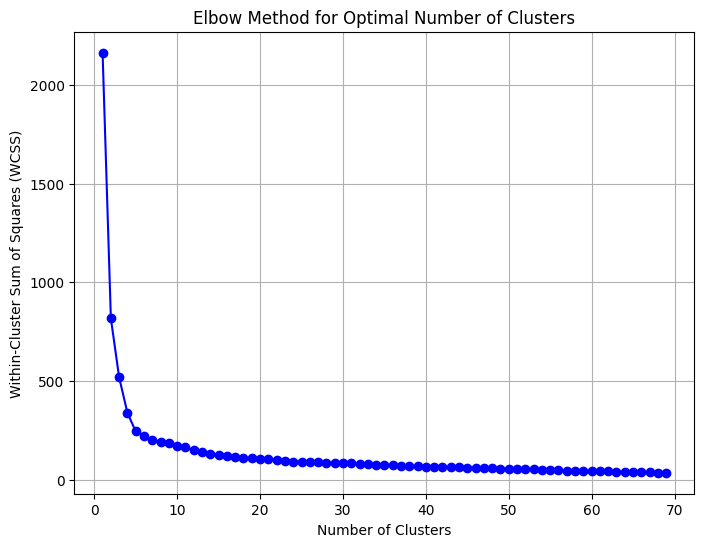

In [ ]:
elbow_method(embeddings, 70)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score , calinski_harabasz_score

In [ ]:
all_metrics_df = pd.DataFrame(columns=['Model', 'Metric', 'Value'])

In [ ]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(embeddings)
cluster_labels = kmeans.labels_


In [ ]:
silhouette_avg = silhouette_score(embeddings , cluster_labels)
db_index= davies_bouldin_score(embeddings  , cluster_labels)
calinski=calinski_harabasz_score(embeddings, cluster_labels)

print(f"Индекс силуэта: {silhouette_avg:.2f} (чем ближе к 1, тем лучше)")
print(f"Индекс Калински-Харабаза: {calinski:.2f} (чем больше, тем лучше)")
print(f"Индекс Дэвиса-Болдина: {db_index:.2f} (чем ближе к 0, тем лучше)")

Индекс силуэта: 0.34 (чем ближе к 1, тем лучше)
Индекс Калински-Харабаза: 221.56 (чем больше, тем лучше)
Индекс Дэвиса-Болдина: 0.93 (чем ближе к 0, тем лучше)


In [ ]:
pca = PCA(n_components=2, random_state=42)
emb_2d = pd.DataFrame(pca.fit_transform(embeddings), columns=['x1', 'x2'])
emb_2d['label'] = cluster_labels


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
import plotly.express as px
fig_bert1 = px.scatter(emb_2d, x='x1', y='x2', color='label',
                 color_continuous_scale='Viridis',
                 width=800, height=600,
                 title="Кластеризация текстов с использованием BERT" )
fig_bert1.update_traces(marker=dict(size=7))
fig_bert1.show()

In [ ]:
pca = PCA(n_components=3, random_state=42)
emb_3d = pd.DataFrame(pca.fit_transform(embeddings), columns=['x1', 'x2', 'x3'])


In [ ]:
emb_3d['label'] = cluster_labels


fig_bert2 = px.scatter_3d(emb_3d, x='x1', y='x2', z='x3', color='label', opacity=0.8, size_max=30, title="3D кластеризация текстов с использованием BERT" )

fig_bert2.show()

In [ ]:
sne = TSNE(n_components=2, random_state=0)
emb_2d = pd.DataFrame(sne.fit_transform(embeddings), columns=['x1', 'x2'])
emb_2d['label'] = cluster_labels
emb_2d['label'].nunique() # 40

6

In [ ]:
fig_bert3 = px.scatter(emb_2d, x='x1', y='x2', color='label',
                 color_continuous_scale='Viridis',
                 width=800, height=600,
                 title="Кластеризация текстов с использованием BERT" )
fig_bert3.update_traces(marker=dict(size=7))
fig_bert3.show()


In [ ]:
sne = TSNE(n_components=3, random_state=0)
emb_3d = pd.DataFrame(sne.fit_transform(embeddings), columns=['x1', 'x2', 'x3'])
emb_3d['label'] = cluster_labels
emb_3d['label'].nunique() # 40

6

In [ ]:

fig_bert4 = px.scatter_3d(emb_3d, x='x1', y='x2', z='x3', color='label', opacity=0.8, size_max=30, title="3D кластеризация текстов с использованием BERT" )

fig_bert4.show()

In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
import umap

In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = reducer.fit_transform(embeddings)

df = pd.DataFrame(embeddings_2d, columns=["x1", "x2"])
df["label"] = cluster_labels


fig_bert5 = px.scatter(
    df, x="x1", y="x2", color="label",
    title="Кластеризация текстов с использованием UMAP",
    labels={"x1": "UMAP 1", "x2": "UMAP 2"},
    width=800, height=600,
    color_continuous_scale="Viridis"
)

fig_bert5.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
reducer = umap.UMAP(n_components=3, random_state=42)

embed_3d=pd.DataFrame(reducer.fit_transform(embeddings), columns=['x1', 'x2', 'x3'])
embed_3d['label'] = cluster_labels
embed_3d['label'].nunique() # 40

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



6

In [ ]:
fig_bert6 = px.scatter_3d(embed_3d, x='x1', y='x2', z='x3', color='label', opacity=0.8, size_max=30, title="3D кластеризация текстов с использованием BERT"  )

fig_bert6.show()

In [ ]:
pip install stop-words

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=cb351980e5019be349758465fa6ec990787ec6f840f43439f72b66f186acad8e
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [ ]:
from sklearn.cluster import  AgglomerativeClustering, AffinityPropagation

AgglomerativeClustering

In [111]:
hc = AgglomerativeClustering(n_clusters = 6, linkage = "ward")
identified_clusters = hc.fit_predict(embeddings)


silhouette_avg = silhouette_score(embeddings , identified_clusters)
db_index= davies_bouldin_score(embeddings  ,identified_clusters)
calinski=calinski_harabasz_score(embeddings, identified_clusters)

print(f"Индекс силуэта: {silhouette_avg:.2f} (чем ближе к 1, тем лучше)")
print(f"Индекс Калински-Харабаза: {calinski:.2f} (чем больше, тем лучше)")
print(f"Индекс Дэвиса-Болдина: {db_index:.2f} (чем ближе к 0, тем лучше)")

Индекс силуэта: 0.38 (чем ближе к 1, тем лучше)
Индекс Калински-Харабаза: 216.96 (чем больше, тем лучше)
Индекс Дэвиса-Болдина: 0.84 (чем ближе к 0, тем лучше)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import pandas as pd
from stop_words import get_stop_words


russian_stopwords = get_stop_words("russian")
english_stopwords = get_stop_words("english")


custom_stopwords = list(set(russian_stopwords + english_stopwords))

cluster_texts = defaultdict(list)
for label, text in zip(identified_clusters , texts):
    cluster_texts[label].append(text)

def analyze_cluster_keywords(cluster_texts, top_n=10):
    cluster_keywords = {}
    vectorizer = TfidfVectorizer(stop_words=custom_stopwords, ngram_range =(2,10))

    for cluster_id, texts in cluster_texts.items():

        X = vectorizer.fit_transform(texts)
        word_counts = X.toarray().sum(axis=0)
        word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))


        top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
        cluster_keywords[cluster_id] = top_words

    return cluster_keywords


cluster_keywords = analyze_cluster_keywords(cluster_texts)


for cluster_id, keywords in cluster_keywords.items():
    print(f"\nКластер {cluster_id}:")
    for word, freq in keywords:
        print(f"{word}: {freq}")
for cluster_id, keywords in cluster_keywords.items():
    words, freqs = zip(*keywords)
    plt.barh(words, freqs)
    plt.title(f"Кластер {cluster_id}")
    plt.xlabel("Частота")
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



In [ ]:
pca = PCA(n_components=2, random_state=42)
emb_2d = pd.DataFrame(pca.fit_transform(embeddings), columns=['x1', 'x2'])
emb_2d['label'] = identified_clusters

fig_bert7 = px.scatter(emb_2d, x='x1', y='x2', color='label',
                 color_continuous_scale='Viridis',
                 width=800, height=600,
                 title="Кластеризация текстов с использованием BERT" )
fig_bert7.update_traces(marker=dict(size=7))
fig_bert7.show()

In [ ]:
pca = PCA(n_components=3, random_state=0)
emb_3d = pd.DataFrame(pca.fit_transform(embeddings), columns=['x1', 'x2', 'x3'])
emb_3d['label'] = identified_clusters

fig_bert8 = px.scatter_3d(emb_3d, x='x1', y='x2', z='x3', color='label', opacity=0.8, size_max=30, title="3D кластеризация текстов с использованием BERT" )

fig_bert8.show()

In [147]:
sne =TSNE(n_components=2, random_state=42)
emb_2d = pd.DataFrame(sne.fit_transform(embeddings), columns=['x1', 'x2'])
emb_2d['label'] = identified_clusters

fig_bert9 = px.scatter(emb_2d, x='x1', y='x2', color='label',
                 color_continuous_scale='Viridis',
                 width=800, height=600,
                 title="Кластеризация текстов с использованием BERT" )
fig_bert9.update_traces(marker=dict(size=7))

fig_bert9.show()

In [148]:
fig9_json = fig_bert9.to_json()


with open('fig9_cluster_2d.json', 'w') as f:
    f.write(fig9_json)

In [112]:
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = reducer.fit_transform(embeddings)

df = pd.DataFrame(embeddings_2d, columns=["x1", "x2"])
df["label"] = cluster_labels


fig_bert_umap = px.scatter(
    df, x="x1", y="x2", color="label",
    title="Кластеризация текстов с использованием UMAP",
    labels={"x1": "UMAP 1", "x2": "UMAP 2"},
    width=800, height=600,
    color_continuous_scale="Viridis"
)

fig_bert_umap.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [143]:
sne = TSNE(n_components=3, random_state=0)
emb_3d = pd.DataFrame(sne.fit_transform(embeddings), columns=['x1', 'x2', 'x3'])
emb_3d['label'] = identified_clusters
emb_3d['label'].nunique()
fig_bert10 = px.scatter_3d(emb_3d, x='x1', y='x2', z='x3', color='label', opacity=0.8, size_max=30, title="3D кластеризация текстов с использованием BERT",width=800, height=600, )

fig_bert10.show()

In [145]:
reducer = umap.UMAP(n_components=3, random_state=42)

embed_3d=pd.DataFrame(reducer.fit_transform(embeddings), columns=['x1', 'x2', 'x3'])
embed_3d['label'] = identified_clusters
embed_3d['label'].nunique()
fig_bert11 = px.scatter_3d(embed_3d, x='x1', y='x2', z='x3', color='label', opacity=0.8, size_max=30, title="3D кластеризация текстов с использованием BERT" ,width=800, height=600)

fig_bert11.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [146]:
fig11_json = fig_bert11.to_json()


with open('fig11_cluster_3d.json', 'w') as f:
    f.write(fig11_json)


Affinity propagation

In [ ]:
ap = AffinityPropagation(random_state = 42)
identified_clusters = ap.fit_predict(embeddings)


silhouette_avg = silhouette_score(embeddings , identified_clusters)
db_index= davies_bouldin_score(embeddings  ,identified_clusters)
calinski=calinski_harabasz_score(embeddings, identified_clusters)

print(f"Индекс силуэта: {silhouette_avg:.2f} (чем ближе к 1, тем лучше)")
print(f"Индекс Калински-Харабаза: {calinski:.2f} (чем больше, тем лучше)")
print(f"Индекс Дэвиса-Болдина: {db_index:.2f} (чем ближе к 0, тем лучше)")


Индекс силуэта: 0.24 (чем ближе к 1, тем лучше)
Индекс Калински-Харабаза: 186.93 (чем больше, тем лучше)
Индекс Дэвиса-Болдина: 1.21 (чем ближе к 0, тем лучше)


In [ ]:
pca = PCA(n_components=3, random_state=0)
emb_3d = pd.DataFrame(pca.fit_transform(embeddings), columns=['x1', 'x2', 'x3'])
emb_3d['label'] = identified_clusters
emb_3d['label'].nunique()
fig_bert12= px.scatter_3d(emb_3d, x='x1', y='x2', z='x3', color='label', opacity=0.8, size_max=30, title="3D кластеризация текстов с использованием BERT" )

fig_bert12.show()

In [ ]:
sne = TSNE(n_components=3, random_state=0)
emb_3d = pd.DataFrame(sne.fit_transform(embeddings), columns=['x1', 'x2', 'x3'])
emb_3d['label'] = identified_clusters
emb_3d['label'].nunique()
fig_bert13 = px.scatter_3d(emb_3d, x='x1', y='x2', z='x3', color='label', opacity=0.8, size_max=30, title="3D кластеризация текстов с использованием BERT" )

fig_bert13.show()

In [ ]:
reducer = umap.UMAP(n_components=3, random_state=42)

embed_3d=pd.DataFrame(reducer.fit_transform(embeddings), columns=['x1', 'x2', 'x3'])
embed_3d['label'] = identified_clusters
embed_3d['label'].nunique()
fig_bert14 = px.scatter_3d(embed_3d, x='x1', y='x2', z='x3', color='label', opacity=0.8, size_max=30, title="3D кластеризация текстов с использованием BERT" )

fig_bert14.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
clustering = DBSCAN(eps=0.9, min_samples=4).fit(embeddings)
cluster_labels_db=clustering.labels_

In [ ]:
silhouette_avg = silhouette_score(embeddings , cluster_labels_db)
db_index= davies_bouldin_score(embeddings  , cluster_labels_db)
calinski=calinski_harabasz_score(embeddings, cluster_labels_db)

print(f"Индекс силуэта: {silhouette_avg:.2f} (чем ближе к 1, тем лучше)")
print(f"Индекс Калински-Харабаза: {calinski:.2f} (чем больше, тем лучше)")
print(f"Индекс Дэвиса-Болдина: {db_index:.2f} (чем ближе к 0, тем лучше)")

Индекс силуэта: -0.37 (чем ближе к 1, тем лучше)
Индекс Калински-Харабаза: 6.55 (чем больше, тем лучше)
Индекс Дэвиса-Болдина: 1.48 (чем ближе к 0, тем лучше)


In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)
embeddings_2d = reducer.fit_transform(embeddings)

df = pd.DataFrame(embeddings_2d, columns=["x1", "x2"])
df["label"] = cluster_labels_db


fig_bert15 = px.scatter(
    df, x="x1", y="x2", color="label",
    title="Кластеризация текстов с использованием UMAP",
    labels={"x1": "UMAP 1", "x2": "UMAP 2"},
    width=800, height=600,
    color_continuous_scale="Viridis"
)

fig_bert15.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
reducer = umap.UMAP(n_components=3, random_state=42)

embed_3d=pd.DataFrame(reducer.fit_transform(embeddings), columns=['x1', 'x2', 'x3'])
embed_3d['label'] = cluster_labels_db
embed_3d['label'].nunique() # 40

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



5

In [ ]:
fig_bert16 = px.scatter_3d(embed_3d, x='x1', y='x2', z='x3', color='label', opacity=0.8, size_max=30, title="3D кластеризация текстов с использованием BERT" )

fig_bert16.show()

### Bert


In [ ]:
from transformers import BertTokenizer, BertModel

In [ ]:
model_name_bert = "DeepPavlov/rubert-base-cased"
tokenizer_bert= BertTokenizer.from_pretrained(model_name_bert)
model_bert= BertModel.from_pretrained(model_name_bert)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
embeddings_bert = []
for text in texts:
    tokens = tokenizer_bert(text, return_tensors="pt", max_length=512, truncation=True, padding="max_length")

    with torch.no_grad():
        outputs = model_bert(**tokens)
        text_embedding = outputs.pooler_output.squeeze().numpy()

    embeddings_bert.append(text_embedding)

embeddings_bert = np.array(embeddings)

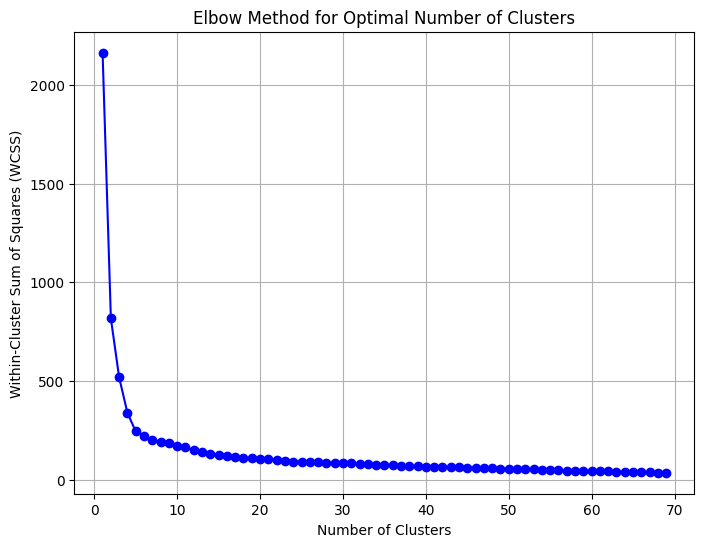

In [ ]:
elbow_method(embeddings_bert, 70)

In [ ]:
num_clusters = 8
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(embeddings_bert)
cluster_labels = kmeans.labels_


In [ ]:
silhouette_avg = silhouette_score(embeddings_bert, cluster_labels)
db_index= davies_bouldin_score(embeddings_bert  , cluster_labels)
calinski=calinski_harabasz_score(embeddings_bert, cluster_labels)

print(f"Индекс силуэта: {silhouette_avg:.2f} (чем ближе к 1, тем лучше)")
print(f"Индекс Калински-Харабаза: {calinski:.2f} (чем больше, тем лучше)")
print(f"Индекс Дэвиса-Болдина: {db_index:.2f} (чем ближе к 0, тем лучше)")

Индекс силуэта: 0.24 (чем ближе к 1, тем лучше)
Индекс Калински-Харабаза: 179.97 (чем больше, тем лучше)
Индекс Дэвиса-Болдина: 1.21 (чем ближе к 0, тем лучше)


In [ ]:
sne = TSNE(n_components=2, random_state=0)
emb_2d = pd.DataFrame(sne.fit_transform(embeddings_bert), columns=['x1', 'x2'])
emb_2d['label'] = cluster_labels
emb_2d['label'].nunique() # 40

8

In [ ]:
import plotly.express as px
fig = px.scatter(emb_2d, x='x1', y='x2', color='label',
                 color_continuous_scale='Viridis',
                 width=800, height=600,
                 title="Кластеризация текстов с использованием BERT" )
fig.update_traces(marker=dict(size=8))
fig.show()

In [ ]:
pca = PCA(n_components=2, random_state=42)
emb_2d = pd.DataFrame(pca.fit_transform(embeddings_bert), columns=['x1', 'x2'])
emb_2d['label'] = cluster_labels
emb_2d['label'].nunique() # 40

8

In [ ]:
import plotly.express as px
fig = px.scatter(emb_2d, x='x1', y='x2', color='label',
                 color_continuous_scale='Viridis',
                 width=800, height=600,
                 title="Кластеризация текстов с использованием BERT" )
fig.update_traces(marker=dict(size=8))
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.




Кластер 6:
mron rga: 0.7135015052016923
speech rate: 0.4115520133033439
code mixing: 0.38788427049883584
nfin npst: 0.2343054198910572
et al: 0.2141261844331313
code switching: 0.1970205818406785
социальной сети: 0.1821350424531994
частей речи: 0.18083618648127356
poss 2sg: 0.1752581761344941
clause order: 0.17326390807090924

Кластер 0:
et al: 0.2509641257254086
друг другом: 0.24301977528809537
creole languages: 0.2071016746303864
verbs falling: 0.15443206428377937
grey matter: 0.14145607155627601
poss 2sg: 0.13895343818141861
компаративной конструкции: 0.13895343818141861
children dyslexia: 0.13057483528271632
друг друга: 0.12694586482224185
google запрос: 0.12590181129383254

Кластер 4:
et al: 0.4130064516910394
русского языка: 0.28730810593574657
working memory: 0.2810421005568774
цветовых обозначений: 0.26095773393959426
восклицательные конструкции: 0.2580903307009567
таким образом: 0.24837824064476122
восклицательных конструкций: 0.2414393416234757
русском языке: 0.2277223946489

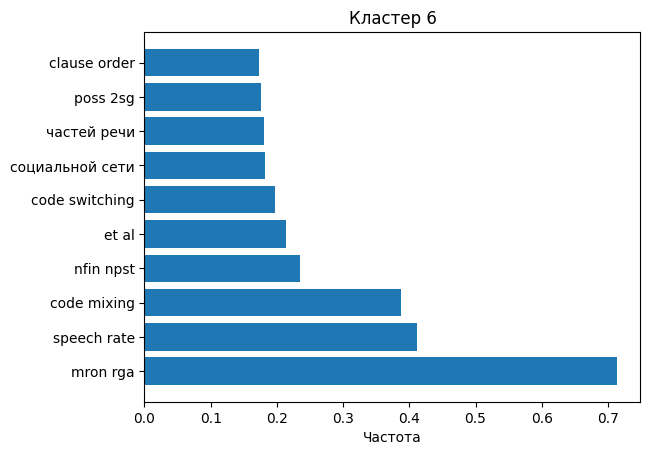

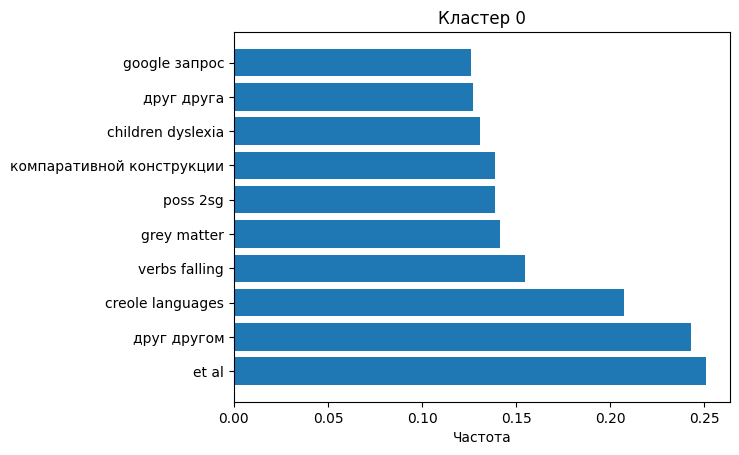

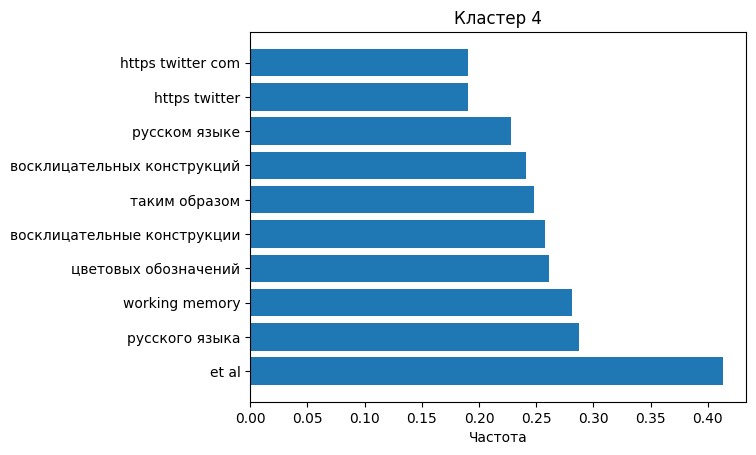

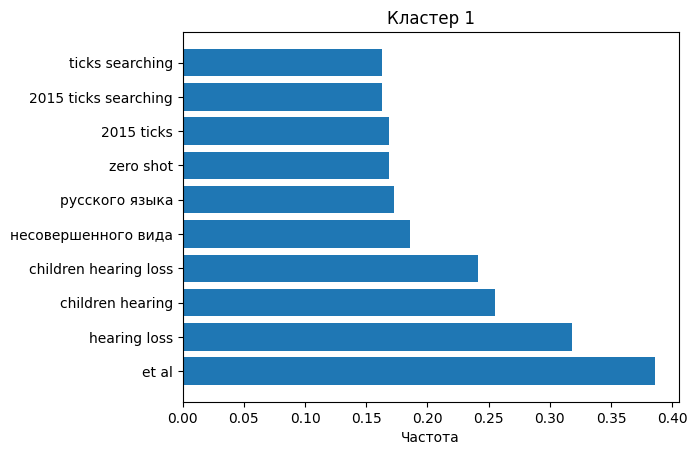

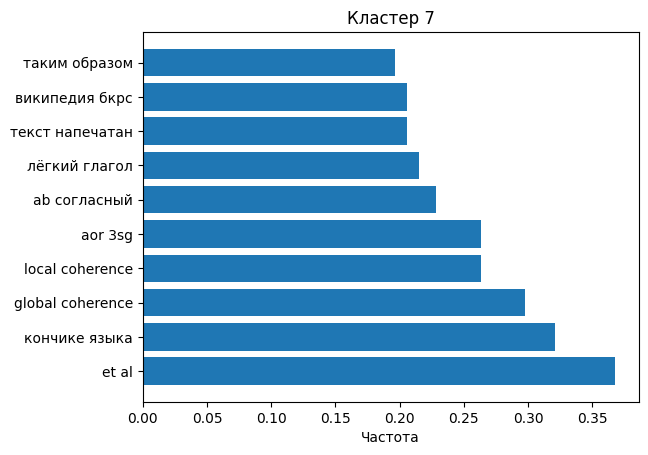

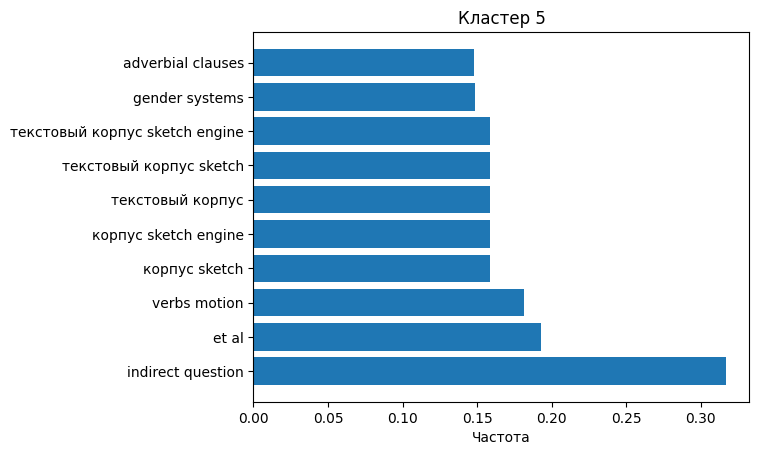

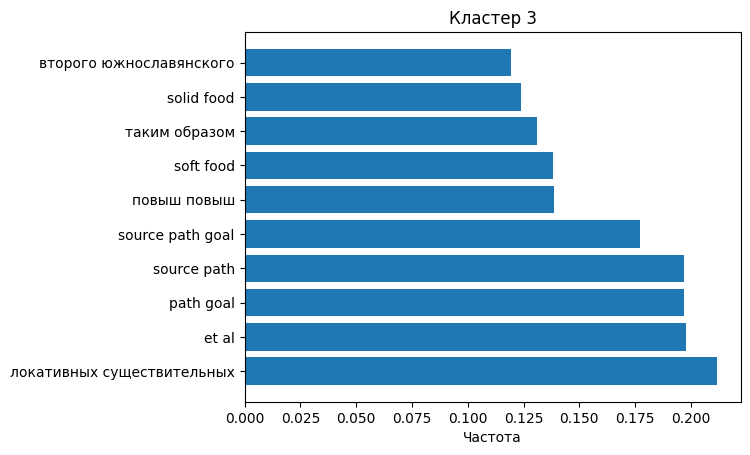

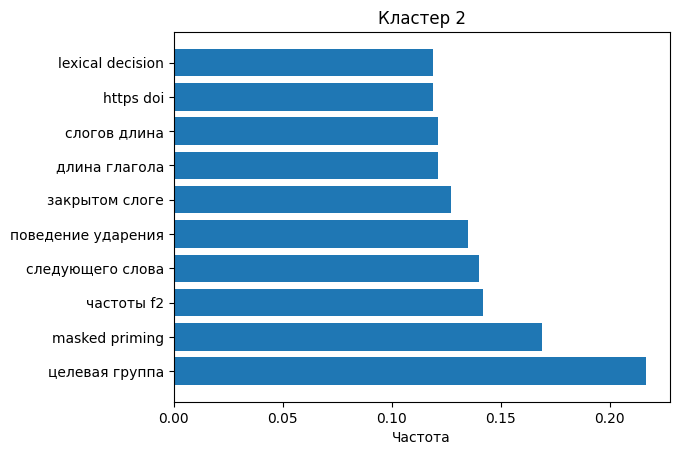

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
import pandas as pd
from stop_words import get_stop_words


russian_stopwords = get_stop_words("russian")
english_stopwords = get_stop_words("english")


custom_stopwords = list(set(russian_stopwords + english_stopwords))

cluster_texts = defaultdict(list)
for label, text in zip(cluster_labels, texts):
    cluster_texts[label].append(text)


def analyze_cluster_keywords(cluster_texts, top_n=10):
    cluster_keywords = {}
    vectorizer = TfidfVectorizer(stop_words=custom_stopwords, ngram_range =(2,10))

    for cluster_id, texts in cluster_texts.items():

        X = vectorizer.fit_transform(texts)
        word_counts = X.toarray().sum(axis=0)
        word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))

        top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
        cluster_keywords[cluster_id] = top_words

    return cluster_keywords

cluster_keywords = analyze_cluster_keywords(cluster_texts)


for cluster_id, keywords in cluster_keywords.items():
    print(f"\nКластер {cluster_id}:")
    for word, freq in keywords:
        print(f"{word}: {freq}")
for cluster_id, keywords in cluster_keywords.items():
    words, freqs = zip(*keywords)
    plt.barh(words, freqs)
    plt.title(f"Кластер {cluster_id}")
    plt.xlabel("Частота")
    plt.show()


Model Longformer 1


In [ ]:
from transformers import LongformerTokenizer,LongformerModel
from transformers import LongformerForMaskedLM, LongformerTokenizerFast


model_name_long = 'allenai/longformer-base-4096'
tokenizer_long = LongformerTokenizer.from_pretrained(model_name_long)
model_long = LongformerModel.from_pretrained(model_name_long).to(device)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

In [ ]:
embeddings_long = []
for text in texts:
    tokens = tokenizer_long(text, return_tensors="pt", max_length=4096, truncation=True, padding="max_length").to(device)

    with torch.no_grad():
        outputs = model_long(**tokens)
        text_embedding = outputs.pooler_output.squeeze().cpu().numpy()

    embeddings_long.append(text_embedding)

embeddings_long = np.array(embeddings_long)

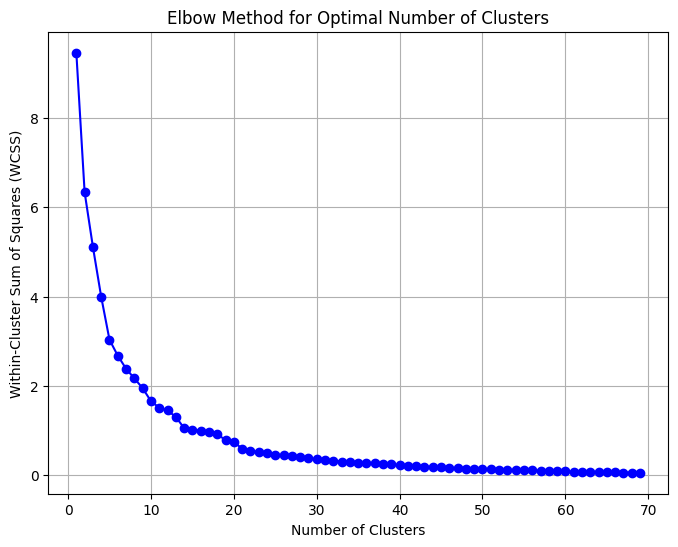

In [ ]:
elbow_method(embeddings_long, 70)

In [ ]:
num_clusters =9
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(embeddings_long)
cl=kmeans.fit_predict(embeddings_long)
cluster_labels = kmeans.labels_

In [ ]:
silhouette_avg = silhouette_score(embeddings_long , cluster_labels)
db_index= davies_bouldin_score(embeddings_long  , cluster_labels)
calinski=calinski_harabasz_score(embeddings_long  , cluster_labels)

print(f"Индекс силуэта: {silhouette_avg:.2f} (чем ближе к 1, тем лучше)")
print(f"Индекс Калински-Харабаза: {calinski:.2f} (чем больше, тем лучше)")
print(f"Индекс Дэвиса-Болдина: {db_index:.2f} (чем ближе к 0, тем лучше)")

Индекс силуэта: 0.42 (чем ближе к 1, тем лучше)
Индекс Калински-Харабаза: 52.04 (чем больше, тем лучше)
Индекс Дэвиса-Болдина: 0.76 (чем ближе к 0, тем лучше)


In [ ]:
pca = PCA(n_components=2, random_state=42)
emb_2d = pd.DataFrame(pca.fit_transform(embeddings), columns=['x1', 'x2'])
emb_2d['label'] = cluster_labels
emb_2d['label'].nunique() # 40

9

In [ ]:

fig = px.scatter(emb_2d, x='x1', y='x2', color='label',
                 color_continuous_scale='Viridis',
                 width=800, height=600,
                 title="Кластеризация текстов с использованием BERT" )
fig.update_traces(marker=dict(size=8))
fig.show()

In [ ]:
sne = TSNE(n_components=2, random_state=0)
emb_2d = pd.DataFrame(sne.fit_transform(embeddings), columns=['x1', 'x2'])
emb_2d['label'] = cluster_labels
emb_2d['label'].nunique() # 40

9

In [ ]:

fig = px.scatter(emb_2d, x='x1', y='x2', color='label',
                 color_continuous_scale='Viridis',
                 width=800, height=600,
                 title="Кластеризация текстов с использованием BERT" )
fig.update_traces(marker=dict(size=8))
fig.show()

Longformer model 2

In [ ]:
from transformers import LongformerTokenizer,LongformerModel
from transformers import LongformerForMaskedLM, LongformerTokenizerFast

model_long = LongformerModel.from_pretrained('kazzand/ru-longformer-large-4096').to(device)
tokenizer_long = LongformerTokenizerFast.from_pretrained('kazzand/ru-longformer-large-4096')




config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

Some weights of LongformerModel were not initialized from the model checkpoint at kazzand/ru-longformer-large-4096 and are newly initialized: ['longformer.pooler.dense.bias', 'longformer.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.93M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'LongformerTokenizerFast'.


In [ ]:
embeddings_long = []
for text in texts:
    tokens = tokenizer_long(text, return_tensors="pt", max_length=4096, truncation=True, padding="max_length").to(device)

    with torch.no_grad():
        outputs = model_long(**tokens)
        text_embedding = outputs.pooler_output.squeeze().cpu().numpy()

    embeddings_long.append(text_embedding)

embeddings_long = np.array(embeddings_long)

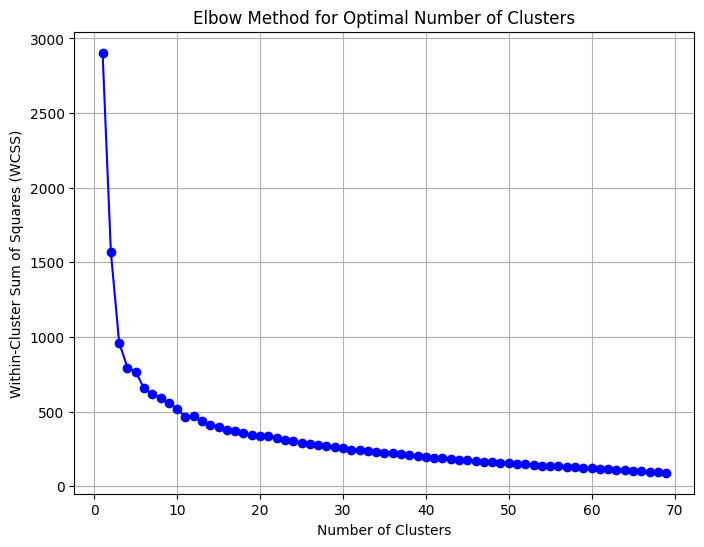

In [ ]:
elbow_method(embeddings_long, 70)

In [ ]:
num_clusters =9
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(embeddings_long)
cl=kmeans.fit_predict(embeddings_long)
cluster_labels = kmeans.labels_

In [ ]:
silhouette_avg = silhouette_score(embeddings_long , cluster_labels)
db_index= davies_bouldin_score(embeddings_long  , cluster_labels)
calinski=calinski_harabasz_score(embeddings_long  , cluster_labels)

print(f"Индекс силуэта: {silhouette_avg:.2f} (чем ближе к 1, тем лучше)")
print(f"Индекс Калински-Харабаза: {calinski:.2f} (чем больше, тем лучше)")
print(f"Индекс Дэвиса-Болдина: {db_index:.2f} (чем ближе к 0, тем лучше)")

Индекс силуэта: 0.16 (чем ближе к 1, тем лучше)
Индекс Калински-Харабаза: 56.59 (чем больше, тем лучше)
Индекс Дэвиса-Болдина: 1.11 (чем ближе к 0, тем лучше)


In [ ]:
pca = PCA(n_components=2, random_state=42)
emb_2d = pd.DataFrame(pca.fit_transform(embeddings), columns=['x1', 'x2'])
emb_2d['label'] = cluster_labels
emb_2d['label'].nunique() # 40

9

In [ ]:

fig = px.scatter(emb_2d, x='x1', y='x2', color='label',
                 color_continuous_scale='Viridis',
                 width=800, height=600,
                 title="Кластеризация текстов с использованием BERT" )
fig.update_traces(marker=dict(size=8))
fig.show()

In [ ]:
sne = TSNE(n_components=2, random_state=0)
emb_2d = pd.DataFrame(sne.fit_transform(embeddings), columns=['x1', 'x2'])
emb_2d['label'] = cluster_labels
emb_2d['label'].nunique() # 40

9

In [ ]:

fig = px.scatter(emb_2d, x='x1', y='x2', color='label',
                 color_continuous_scale='Viridis',
                 width=800, height=600,
                 title="Кластеризация текстов с использованием BERT" )
fig.update_traces(marker=dict(size=8))
fig.show()

### Статистики


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df=pd.read_json('decoded_data_fcl_filtered.json')
df

,name,author,advisor,course,score,year,annotation,link
0,Разрешение кореференции в ответе на вопросы по...,Джубаева Нелля Аманжоловна,Сериков Олег Алексеевич,Бакалавриат,7,2023,Visual Question Answering (VQA) - это растущая...,djubaeva_na_razreshenie-koreferencii-v-otvete-...
1,Речевые сбои при расстройствах шизофреническог...,Голева Диана Михайловна,Худякова Мария Викторовна,Бакалавриат,7,2023,"Несмотря на то, что исследования проблем психи...",goleva_dm_rechevye-sboi-pri-rasstroystvah-shiz...
2,Влияние данных на качество TTS систем,Дятлов Игорь Владиславович,Сериков Олег Алексеевич,Бакалавриат,8,2023,В этой статье я дообучаю модель text-to-speech...,dyatlov_iv_vliyanie-dannyh-na-kachestvo-tts-si...
3,Проприетивные и привативные аффиксы в уральски...,Лапшина Ксения Михайловна,Стенин Иван Андреевич,Бакалавриат,10,2023,В работе на данных корпусов и грамматических о...,lapshina_km_proprietivnye-i-privativnye-affiks...
4,Нейросети в задачах GEC: попытка усовершенство...,Санникова Екатерина Максимовна,Клышинский Эдуард Станиславович,Бакалавриат,10,2023,Исследования в области автоматического исправл...,sannikova_em_neyroseti-v-zadachah-gec-popytka-...
...,...,...,...,...,...,...,...,...
131,Апокопы в современном французском языке: образ...,Стаферова Дарья Алексеевна,Гилярова Ксения Алексеевна,Бакалавриат,9,2015,Настоящее исследование посвящено феномену фина...,staferova_da_apokopy-v-sovremennom-francuzskom...
132,Исследование типов частотных ошибок в корпусе ...,Хромаленкова Анастасия Николаевна,Виноградова Ольга Ильинична,Бакалавриат,10,2015,"Исследование, представленное в данной дипломно...",hromalenkova_an_issledovanie-tipov-chastotnyh-...
133,"""Ошибаться"": семантический анализ в типологиче...",Швачкина Евгения Павловна,Резникова Татьяна Исидоровна,Бакалавриат,8,2015,Данная выпускная квалифицированная работа посв...,shvachkina_ep_oshibatsya-semanticheskiy-analiz...
134,"Разработка, апробация и стандартизация психоли...",Щеголева Софья Игоревна,Иванова Мария Васильевна,Бакалавриат,8,2015,Для постановки верного диагноза и выбора эффек...,shchegoleva_si_razrabotka-aprobaciya-i-standar...


In [ ]:
df = df.dropna(subset=['score'])

In [ ]:
average_grade_by_year = df.groupby('year')['score'].mean()
top_lecturers = df.groupby('advisor')['score'].mean()
count_per_year = df.groupby('year')['name'].count()
top11_popular_lecturers = df.groupby('advisor')['name'].count().sort_values(ascending=False)[:11]

In [137]:

# Средняя оценка по годам
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=average_grade_by_year.index,
    y=average_grade_by_year.values,
    mode='lines+markers',
    marker=dict(color='white'),
    line=dict(color='lightblue',width=5)
))
fig1.update_layout(
    title='Средняя оценка по годам',
    xaxis_title='Год',
    yaxis_title='Средняя оценка',
    paper_bgcolor='rgb(87, 74, 87)',
    plot_bgcolor='rgb(87, 74, 87)',
    font=dict(color='white'), height=600
)
fig1.show()

In [138]:
fig1_json = fig1.to_json()


with open('fig1_mean_year.json', 'w') as f:
    f.write(fig1_json)

In [104]:
# Топ преподавателей по средней оценке
fig2 = px.bar(
    x=top_lecturers.index,
    y=top_lecturers.values,
    labels={'x': 'Преподаватель', 'y': 'Средняя оценка'},
    title='Средняя оценка по преподавателям'
)
fig2.update_traces(marker_color='lightblue')
fig2.update_layout(
    paper_bgcolor='rgb(87, 74, 87)',
    plot_bgcolor='rgb(87, 74, 87)',
    font=dict(color='white'),
    xaxis=dict(tickangle=45,showgrid=True)
)
fig2.show()

In [134]:
# Количество работ по годам
fig3 = px.bar(
    x=count_per_year.index,
    y=count_per_year.values,
    labels={'x': 'Год', 'y': 'Количество работ'},
    title='Количество работ по годам',height=600,
)
fig3.update_traces(marker_color='lightblue')
fig3.update_layout(
    paper_bgcolor='rgb(87, 74, 87)',
    plot_bgcolor='rgb(87, 74, 87)',
    font=dict(color='white'),
    xaxis=dict(showgrid=True)
)
fig3.show()

In [135]:
fig3_json = fig3.to_json()


with open('fig1_k_year.json', 'w') as f:
    f.write(fig3_json)

In [132]:

# Топ самых популярных преподавателей
fig4 = px.bar(
    x=top11_popular_lecturers.index,
    y=top11_popular_lecturers.values,
    labels={'x': 'Преподаватель', 'y': 'Количество работ'},
    title='Топ самых популярных преподавателей', height=600,
)
fig4.update_traces(marker_color='lightblue')
fig4.update_layout(
    paper_bgcolor='rgb(87, 74, 87)',
    plot_bgcolor='rgb(87, 74, 87)',
    font=dict(color='white'),
    xaxis=dict(showgrid=True,tickangle=50,tickfont=dict(size=14))

)
fig4.show()

In [133]:
fig4_json = fig4.to_json()


with open('fig1_top_of.json', 'w') as f:
    f.write(fig4_json)